A more complicated example where SVM is used to recognize faces. Note that PCA is used to reduce the dimensionality of the origninal face images. <br>
<br>
Author: Jiajia Sun at University of Houston, 02/14/2019.

# 1. Load some packages

In [1]:
# Load the Labeled Faces in the Wild (LFW) people dataset
from sklearn.datasets import fetch_lfw_people

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# 2. Fetch some face images

In [3]:
faces = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [4]:
n_classes = faces.target_names.shape[0]

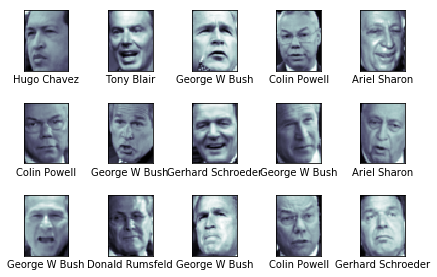

In [5]:
fig, ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])
fig.tight_layout()  
plt.show()

# 3. Create training and test sets

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size = 0.25, random_state = 42)

# 4. Use PCA to simplify the data

In [9]:
pca = PCA(svd_solver = 'randomized', n_components = 150, whiten = True).fit(X_train)

In [10]:
faces.data.shape

(1288, 1850)

In [11]:
pca.components_.shape

(150, 1850)

In [12]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# 5. Perform grid search to determine optimal hyperparameters

In [13]:
from sklearn.model_selection import GridSearchCV
from time import time

t0 = time()
param_grid = {'C': [1, 1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

done in 25.189s
Best estimator found by grid search:
SVC(C=100.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# 6. Make predictions on test dataset

In [14]:
y_pred = clf.predict(X_test_pca)

# 7. Summarize the prediction results using statistics

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [16]:
print(classification_report(y_test, y_pred, target_names=faces.target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.54      0.64        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       1.00      0.67      0.80        27
    George W Bush       0.82      0.98      0.89       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00      0.60      0.75        15
       Tony Blair       0.96      0.75      0.84        36

      avg / total       0.87      0.85      0.85       322

[[  7   1   0   5   0   0   0]
 [  1  52   0   7   0   0   0]
 [  1   2  18   6   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   4  19   0   1]
 [  0   3   0   2   1   9   0]
 [  0   2   0   7   0   0  27]]


# 8. Visualize some predictions

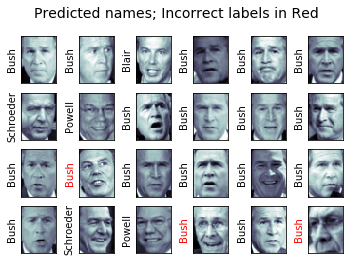

In [17]:
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(50,37), cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],color='black' if y_pred[i]==y_test[i] else 'red')
fig.suptitle('Predicted names; Incorrect labels in Red', size = 14)
plt.show()

For more infomation, see http://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py

To learn more about PCA in scikit-learn, please refer to this webpage http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html